# Importing All necessary Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Warnings

In [69]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [70]:
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [72]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

In [73]:
df.shape

(209593, 37)

Drop the column named "Unnamed: 0" because all the values are unique.Let me drop another column named "pcircle" because there is only one value.

In [74]:
df.drop(['pcircle','Unnamed: 0'],axis=1,inplace=True)

In [75]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

### Exploratory the catagorical column

In [76]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('\n\n\n**********************************************************************************')
        print("\n")

msisdn:['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
47819I90840    7
04581I85330    7
22038I88658    6
60744I91197    6
29191I82738    6
              ..
41698I90589    1
98495I89233    1
17267I85340    1
73146I90846    1
83144I70372    1
Name: msisdn, Length: 186243, dtype: int64



**********************************************************************************


pdate:['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-0

There are two catagorical columns named "pdate" and "msisdn"

# Split pdate to Year,month and day

In [77]:
df['pdate']=pd.to_datetime(df["pdate"])

In [78]:
df["pdate"]

0        2016-07-20
1        2016-08-10
2        2016-08-19
3        2016-06-06
4        2016-06-22
            ...    
209588   2016-06-17
209589   2016-06-12
209590   2016-07-29
209591   2016-07-25
209592   2016-07-07
Name: pdate, Length: 209593, dtype: datetime64[ns]

In [79]:
df["year"]=df["pdate"].dt.year
df["month"]=df["pdate"].dt.month
df["day"]=df["pdate"].dt.day

In [80]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,year,month,day
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,2016,6,22


# Dropping 'pdate' columns

In [81]:
df.drop(['pdate'],axis=1,inplace=True)

In [82]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

All the incidents have been happened at 2016. So, it will not effect our dataset. Let me delete the year column.

In [83]:
df.drop(['year'],axis=1,inplace=True)

In [84]:
print(df.nunique())

print("\n\n\n")
print("\n\n\n")

print(df.info())


label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

# Summary statistics

In [85]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000


# Correlation

In [86]:
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362,0.156148,0.068643


In [87]:
df1=df[['rental30','fr_ma_rech30','cnt_loans30','amnt_loans30']]
df1=pd.DataFrame(df1)

In [88]:
df1.head()

,rental30,fr_ma_rech30,cnt_loans30,amnt_loans30
0,220.13,21.0,2,12
1,3691.26,0.0,1,12
2,900.13,0.0,1,6
3,159.42,0.0,2,12
4,1098.90,2.0,7,42


In [89]:
for column1 in df1.columns:
    #if df[column].dtype==object:
        print(str(column1) + ':' + str(df[column1].unique()))
        print(df[column1].value_counts())
        print('\n\n\n**********************************************************************************')
        print("\n")

rental30:[ 220.13 3691.26  900.13 ... 5861.83  411.83  483.92]
0.00        7566
200.13      1379
99.56       1020
400.26       530
199.12       461
            ... 
1103.55        1
6128.63        1
577.44         1
14544.75       1
2780.99        1
Name: rental30, Length: 132148, dtype: int64



**********************************************************************************


fr_ma_rech30:[2.10000000e+01 0.00000000e+00 2.00000000e+00 ... 9.05481035e+05
 6.20381981e+05 7.47564075e+05]
0.000000         78683
1.000000         22370
2.000000         18849
3.000000         14306
4.000000         11194
                 ...  
832329.313736        1
621153.282118        1
903140.291804        1
774114.500615        1
978141.221916        1
Name: fr_ma_rech30, Length: 1083, dtype: int64



**********************************************************************************


cnt_loans30:[ 2  1  7  3  4  5  8  6 10 12  0 11  9 21 17 15 19 13 18 25 22 20 16 14
 28 29 23 33 30 26 36 31 27 24 32 

# EDA

# rental30

In [90]:
lst = [df]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [91]:
count_balance_response_pct = pd.crosstab(df['label'],df['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [92]:
bal = pd.DataFrame(df['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

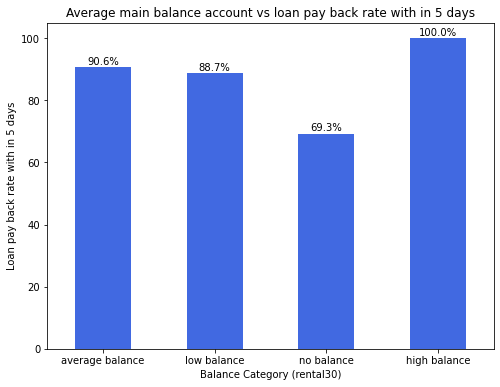

In [93]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

# fr_ma_rech30

In [94]:
lst = [df]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [95]:
count_fre_response_pct = pd.crosstab(df['label'],df['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [96]:
fre = pd.DataFrame(df['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)


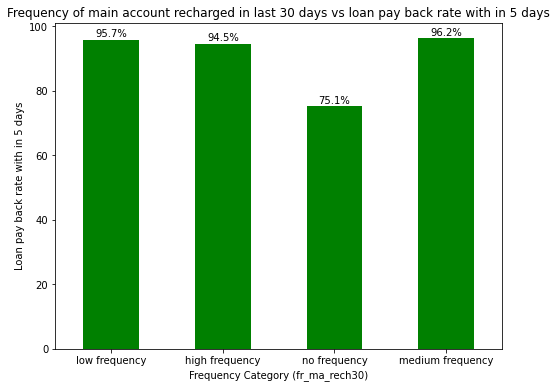

In [97]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('green'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


# cnt_loans30

In [98]:
lst = [df]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [99]:
count_loan_response_pct = pd.crosstab(df['label'],df['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [100]:
fre = pd.DataFrame(df['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

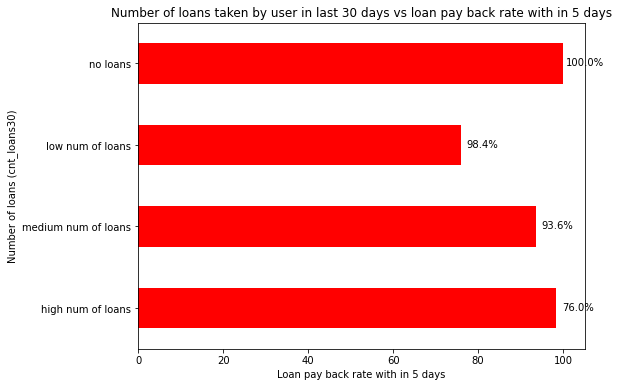

In [101]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('red'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

# amnt_loans30

In [102]:
lst = [df]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [103]:
count_loanamnt_response_pct = pd.crosstab(df['label'],df['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [104]:
fre1 = pd.DataFrame(df['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

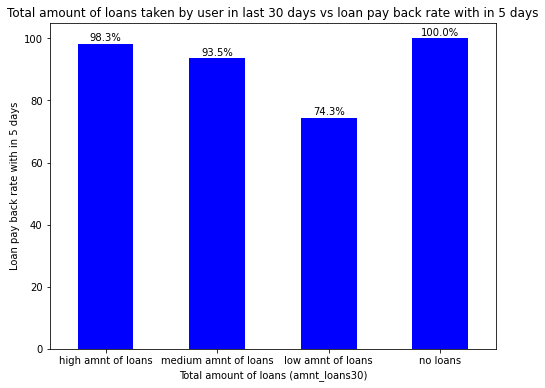

In [105]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('blue'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

In [106]:
df.nunique()

label                            2
msisdn                      186243
aon                           4507
daily_decr30                147026
daily_decr90                158670
rental30                    132148
rental90                    141033
last_rech_date_ma             1186
last_rech_date_da             1174
last_rech_amt_ma                70
cnt_ma_rech30                   71
fr_ma_rech30                  1083
sumamnt_ma_rech30            15141
medianamnt_ma_rech30           510
medianmarechprebal30         30428
cnt_ma_rech90                  110
fr_ma_rech90                    89
sumamnt_ma_rech90            31771
medianamnt_ma_rech90           608
medianmarechprebal90         29785
cnt_da_rech30                 1066
fr_da_rech30                  1072
cnt_da_rech90                   27
fr_da_rech90                    46
cnt_loans30                     40
amnt_loans30                    48
maxamnt_loans30               1050
medianamnt_loans30               6
cnt_loans90         

In [107]:
df.

SyntaxError: invalid syntax (<ipython-input-107-38e9e33c87a8>, line 1)

Text(0.5, 1.0, 'Correlation with Target Variable')

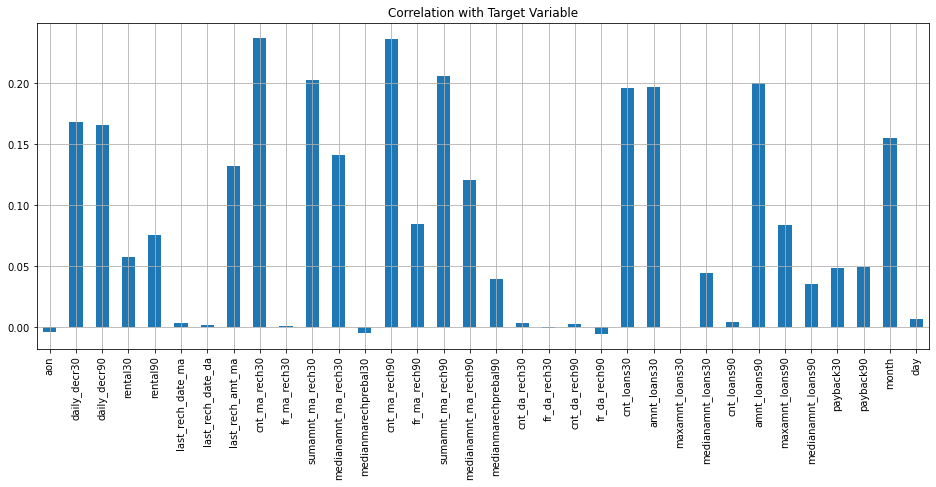

In [108]:
plt.figure(figsize=(16,6))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable")

In [109]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'month', 'day', 'balance_group', 'frequency_group',
       'loan_frequency_group', 'loanamnt_frequency_group'],
      dtype='object')

In [110]:
df.corrwith(df["label"])

label                   1.000000
aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt

### Drop unnecessary columns

In [111]:
df.drop(['msisdn','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [112]:
df.drop(['last_rech_date_da','cnt_da_rech30','cnt_da_rech90'],axis=1,inplace=True)
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


# Outliers

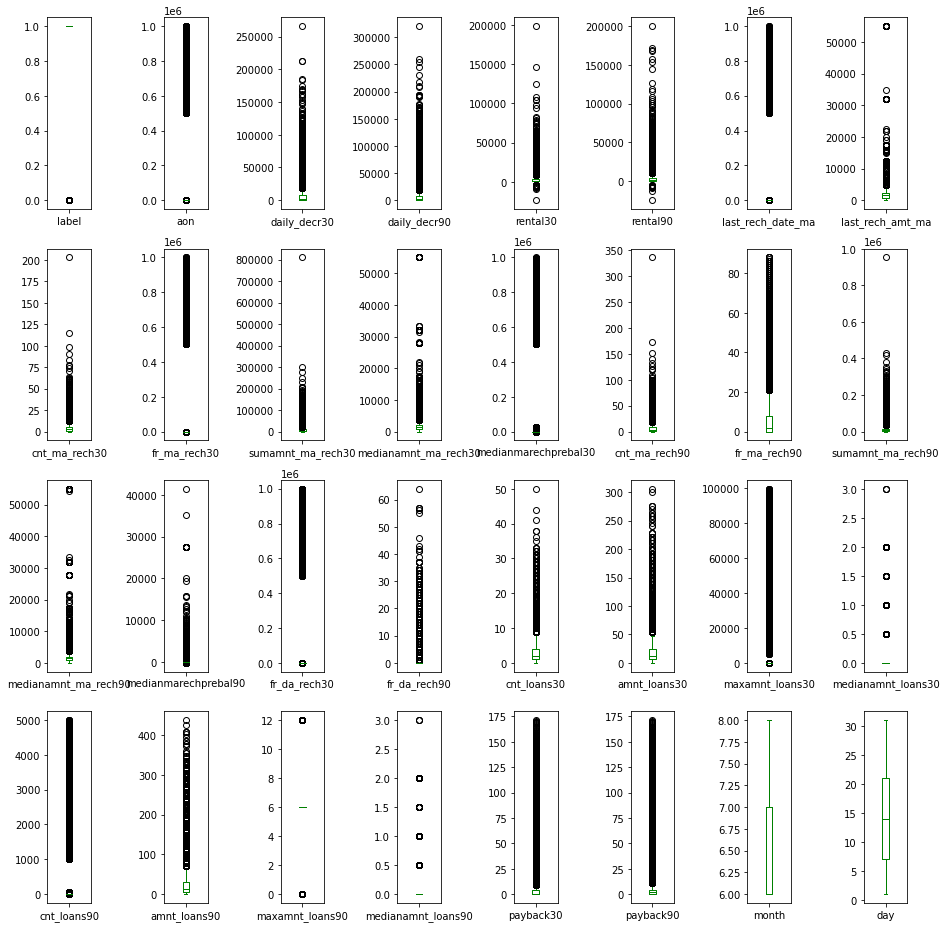

In [113]:
df.plot(kind='box',subplots=True,layout=(4,8),color='green',figsize=(13,13))
plt.tight_layout()

Almost all the columns there are outliers

# Skewness

In [114]:
df.columns


Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'fr_da_rech30', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'day'],
      dtype='object')

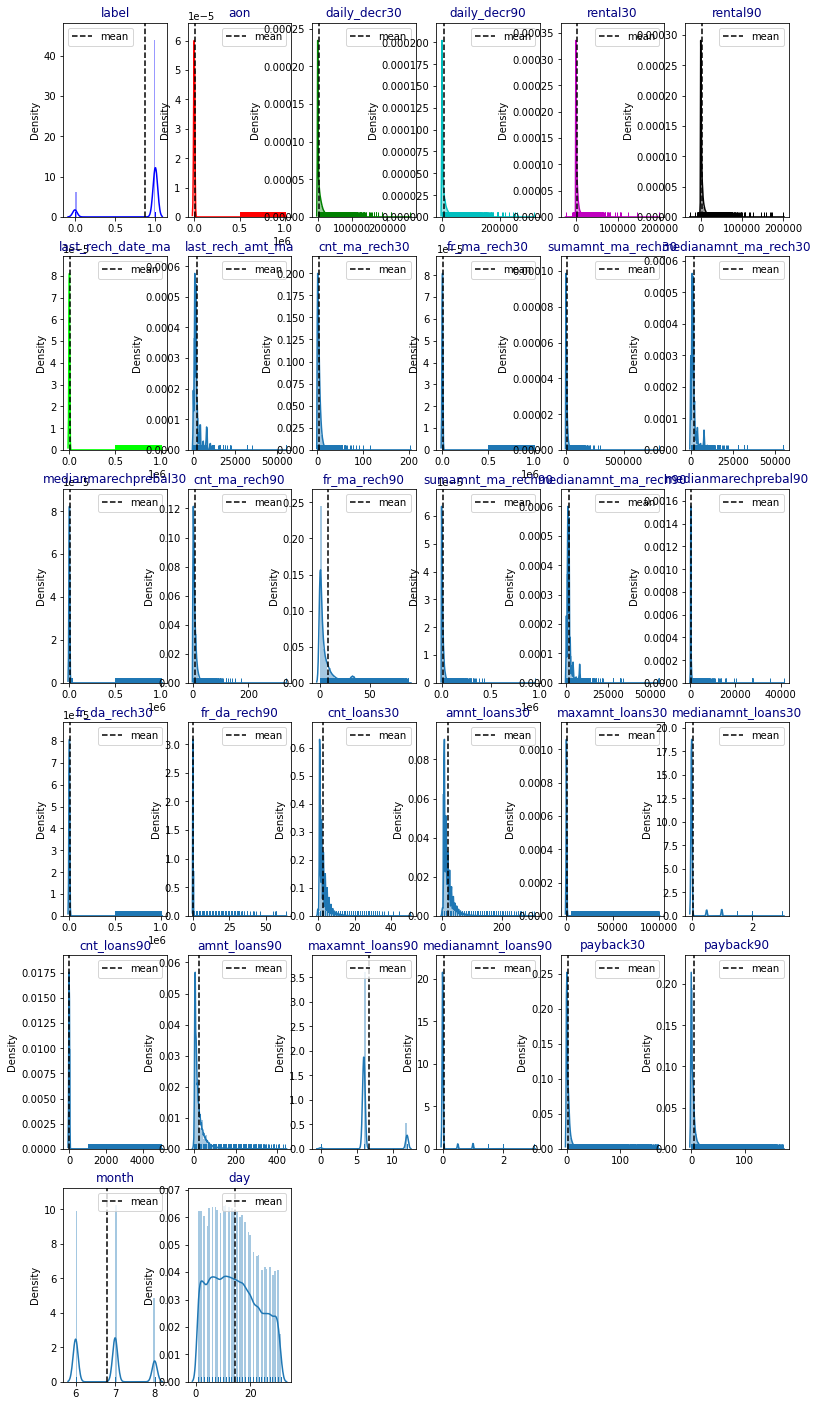

In [115]:
import itertools
cols=['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'fr_da_rech30', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'month', 'day']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(6,6,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

# Spilitting the data into input and output variable

In [123]:
x=df.drop(columns=['label'],axis=1)
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [124]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [125]:
x=pd.DataFrame(x)

In [126]:
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,day
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,3078.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,5787.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,1539.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,20029.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22


In [127]:
x.shape

(209593, 31)

# Removing Outliers

# Z-Score

In [128]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(x))
threshold=3
new_x=x[(z<3).all(axis=1)]

In [129]:
new_x.shape

(163331, 31)

# IQR

In [130]:
q1=x.quantile(0.25)
q3=x.quantile(0.75)
IQR=q3-q1
print(IQR)

aon                       736.000
daily_decr30             7201.560
daily_decr90             7760.098
rental30                 3076.520
rental90                 3901.530
last_rech_date_ma           6.000
last_rech_amt_ma         1539.000
cnt_ma_rech30               4.000
fr_ma_rech30                6.000
sumamnt_ma_rech30        8470.000
medianamnt_ma_rech30     1154.000
medianmarechprebal30       72.000
cnt_ma_rech90               6.000
fr_ma_rech90                8.000
sumamnt_ma_rech90       13683.000
medianamnt_ma_rech90     1151.000
medianmarechprebal90       64.710
fr_da_rech30                0.000
fr_da_rech90                0.000
cnt_loans30                 3.000
amnt_loans30               18.000
maxamnt_loans30             0.000
medianamnt_loans30          0.000
cnt_loans90                 4.000
amnt_loans90               24.000
maxamnt_loans90             0.000
medianamnt_loans90          0.000
payback30                   3.750
payback90                   4.500
month         

In [131]:
new2_x=x[~((x<(q1-1.5*IQR))|(x>(q3+1.5*IQR))).any(axis=1)]
print(new2_x.shape)

(72436, 31)


# Removing skewness

In [132]:
(df < 0).values.any()

True

In [133]:
df.skew()

label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
fr_da_rech30            14.776430
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans90          1.678304
medianamnt_loans90       4.895720
payback30                8.310695
payback90     

# Yeo Jonson Method

In [134]:
from sklearn.preprocessing import power_transform     #box-cox is only for positive but yeo-johnson is for both negative and positive
x=power_transform(x,method='yeo-johnson')

In [135]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,-0.177112,0.332156,0.299181,-0.580786,-0.568411,-0.025513,0.083417,-0.275617,1.603299,-0.177906,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,1.813266,1.783964,0.397522,0.710817
1,0.036453,1.116021,1.045084,0.339736,0.148082,0.191368,1.501277,-0.799355,-1.128949,0.219811,...,1.182431,-0.269051,-1.034294,-0.250850,2.325828,-0.248272,-0.937405,-1.018917,1.480133,-0.410151
2,-0.034659,-0.007508,-0.028203,-0.366965,-0.409047,0.000044,0.083417,-0.799355,-1.128949,-0.535362,...,-0.101998,-0.269051,-1.034294,-1.005714,-0.285611,-0.248272,-0.937405,-1.018917,1.480133,0.609967
3,-0.199213,-1.031486,-1.022743,-0.603059,-0.597731,0.299360,-0.291052,-1.694157,-1.128949,-1.902189,...,-0.101998,-0.269051,-0.186805,-0.250850,-0.285611,-0.248272,-0.937405,-1.018917,-1.133997,-0.968724
4,0.114880,-0.682337,-0.680928,-0.310473,-0.364212,0.021231,0.449550,0.992270,0.188872,1.262660,...,-0.101998,-0.269051,1.180312,1.097886,-0.285611,-0.248272,0.639236,0.431438,-1.133997,0.907066


# spliting the data into training and testing set

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Checking the shape

In [137]:
print(x_train.shape,'\t\t',x_test.shape)

(167674, 31) 		 (41919, 31)


In [138]:
print(y_train.shape,'\t\t',y_test.shape)

(167674,) 		 (41919,)


# Importing all the model Library

In [139]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Importinf boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# All algorithms are in one Code

In [66]:
#LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("\033[1m"+ 'Accuracy score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************************')
    print('\n')

Accuracy score of LogisticRegression() is : 
0.8828216321954245
[[  719  4578]
 [  334 36288]]
              precision    recall  f1-score   support

           0       0.68      0.14      0.23      5297
           1       0.89      0.99      0.94     36622

    accuracy                           0.88     41919
   macro avg       0.79      0.56      0.58     41919
weighted avg       0.86      0.88      0.85     41919

*******************************************************************


Accuracy score of GaussianNB() is : 
0.7401655573844796
[[ 3983  1314]
 [ 9578 27044]]
              precision    recall  f1-score   support

           0       0.29      0.75      0.42      5297
           1       0.95      0.74      0.83     36622

    accuracy                           0.74     41919
   macro avg       0.62      0.75      0.63     41919
weighted avg       0.87      0.74      0.78     41919

*******************************************************************


Accuracy score of SVC() 

# Finding the best Parameters

# Using GridSearchCV to find the best parameter in RandomForestClassifier()

In [67]:
parameters={'random_state':range(42,100)}
RFC=RandomForestClassifier()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

KeyboardInterrupt: 

# Using Best Parameter

### RandomForestClassifier() with best parameter

In [140]:
RFC=RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print('Accuracy score of',RFC,'is : ')
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

Accuracy score of RandomForestClassifier(random_state=42) is : 
0.9213244590758367
[[ 2764  2533]
 [  765 35857]]
              precision    recall  f1-score   support

           0       0.78      0.52      0.63      5297
           1       0.93      0.98      0.96     36622

    accuracy                           0.92     41919
   macro avg       0.86      0.75      0.79     41919
weighted avg       0.91      0.92      0.91     41919



# Cross Validation score

### Cross validate the RandomForestClassifier()

In [141]:
score=cross_val_score(RFC,x,y,scoring='accuracy')
print("model:",RFC)
print("Score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

model: RandomForestClassifier(random_state=42)
Score: [0.9215153  0.92058494 0.92046566 0.92199055 0.92103631]
Mean score: 0.921118552574546
Standard deviation: 0.0005719394309432784


#### Among all three models RandomForestClassifier() gives highest score so we adopt RandomForestClassifier as our Final Model

# Plotting Confusion matrix for RandomForestClassifier()

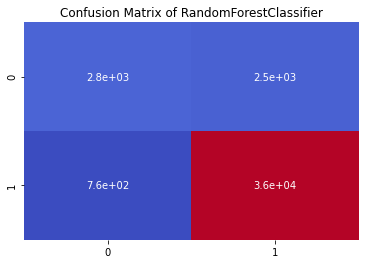

In [143]:
cm=confusion_matrix(y_test,predRFC)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of RandomForestClassifier")
plt.show()

# Auc_Roc Curve and finding auc score

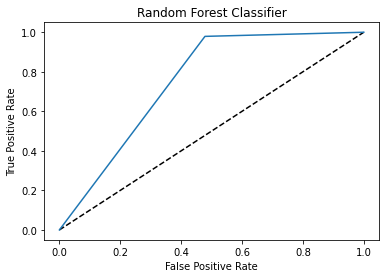

0.7504578560511257


In [144]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=RFC.predict(x_test)
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predRFC)
print(auc_score)

# Saving the model

In [ ]:
import joblib

# Save the model as a pickle in a file

In [ ]:
joblib.dump(RFC,'credit_defaulter.pkl')